In [0]:
import cv2

In [0]:

import numpy as np
from tqdm import tqdm

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import os

In [0]:
import random

In [0]:
import gc

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
train_covid= '/content/gdrive/"My Drive"/"Covid project"/Covid project/train_5-5-20-2-45pm/covid'
a= !ls {train_covid}
len(a)

2

In [0]:
train_dir='/content/gdrive/My Drive/Covid project/Covid project/train_5-5-20-2-45pm'
test_dir='/content/gdrive/My Drive/Covid project/Covid project/test_5-5-20-2-45pm'
#train_apple=['C:/Users/Saili/Desktop/hale_1\{}'.format(i) for i in os.listdir(train_dir) if 'apple' in i]
train_covid=os.path.join(train_dir,'covid')
test_covid=os.path.join(test_dir,'covid')
#print(tqdm(os.listdir(train_apple)))
#train_orange=['C:/Users/Saili/Desktop/hale_1\{}'.format(i) for i in os.listdir(train_dir) if 'orange' in i]
train_normal=os.path.join(train_dir,'normal')
test_normal=os.path.join(test_dir,'normal')

In [13]:
len(os.listdir(train_covid))


624

In [0]:
train_imgs=[]
labels=['covid','normal']
for l in labels:
  new_path=os.path.join(train_dir,l)
  num_label=labels.index(l)
  list=os.listdir(new_path)
  for img in list:
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_imgs.append([img,num_label])
    #imgplot=plt.imshow(RGB_img)
    
    #plt.show()


In [0]:
random.shuffle(train_imgs)

In [17]:
np.array(train_imgs).shape

(1248, 2)

In [0]:
train_imgs=np.array(train_imgs)
y=train_imgs[:,1]
X=train_imgs[:,0]

In [19]:
X.shape

(1248,)

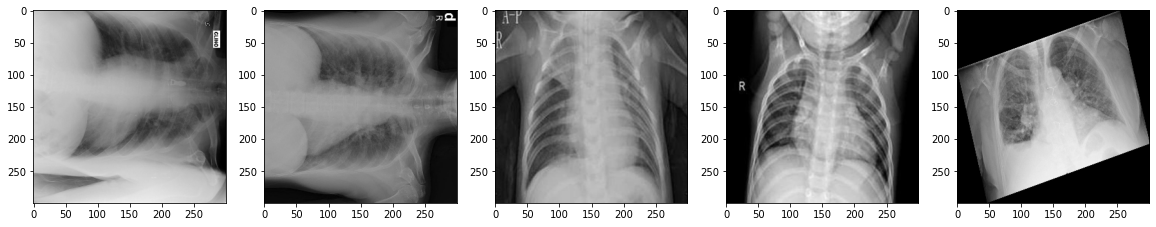

In [21]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
    plt.subplot(5/columns +1,columns,i+1)
    RGB_img = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(RGB_img)
    #plt.imshow(X[i])

In [22]:
del train_imgs
gc.collect()

15

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Covid and normal')

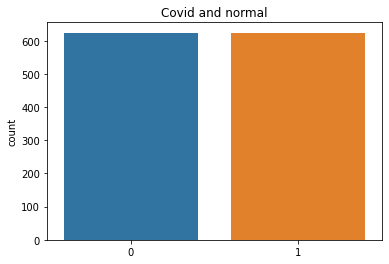

In [23]:
import seaborn as sns
X=np.array(X)
y=np.array(y)
sns.countplot(y)
plt.title('Covid and normal')

In [24]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1248,)
(1248,)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(998,)
(250,)
(998,)
(250,)


In [26]:
del X
del y
gc.collect()

0

In [0]:
ntrain=len(X_train)
nval=len(X_val)
batch_size=32 #4,8,16,32

In [0]:
X_train1=[]
X_val1=[]
y_train1=[]
y_val1=[]
for i in range(len(X_train)):
  X_train1.append(X_train[i])
for i in range(len(X_val)):
  X_val1.append(X_val[i])
for i in range(len(y_train)):
  y_train1.append(y_train[i])
for i in range(len(y_val)):
  y_val1.append(y_val[i])

In [29]:
np.array(X_val1).shape

(250, 300, 300, 3)

In [30]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return (K.log(x+(1+x**2)**0.5))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [33]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation=Activation(custom_activation, name='customActivation'),input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation=Activation(custom_activation, name='customActivation')))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation=Activation(custom_activation, name='customActivation')))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation=Activation(custom_activation, name='customActivation')))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation=Activation(custom_activation, name='customActivation')))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 128)      

In [0]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [0]:
'''
train_datagen= ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,)
                
val_datagen=ImageDataGenerator(rescale=1./255)'''

'\ntrain_datagen= ImageDataGenerator(rescale=1./255,\n                                 rotation_range=40,\n                                 width_shift_range=0.2,\n                                 height_shift_range=0.2,\n                                 shear_range=0.2,\n                                 zoom_range=0.2,\n                                 horizontal_flip=True,)\n                \nval_datagen=ImageDataGenerator(rescale=1./255)'

In [0]:
train_datagen=ImageDataGenerator()

val_datagen=ImageDataGenerator()

In [37]:
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)
X_val1=np.array(X_val1)
y_val1=np.array(y_val1)
print(X_train1.shape)
print(y_train1.shape)
print(X_val1.shape)
print(y_val1.shape)

(998, 300, 300, 3)
(998,)
(250, 300, 300, 3)
(250,)


In [0]:
train_generator=train_datagen.flow(X_train1,y_train1,batch_size=batch_size)
val_generator=val_datagen.flow(X_val1,y_val1,batch_size=batch_size)

In [39]:
history=model.fit(train_generator,
                 steps_per_epoch=ntrain // batch_size,
                 epochs=64,
                 validation_data=val_generator,
                 validation_steps=nval // batch_size)

Epoch 1/64
31/31 [==============================] - 11s 344ms/step - loss: 4.3853 - acc: 0.7733 - val_loss: 0.1956 - val_acc: 0.9732
Epoch 2/64
31/31 [==============================] - 4s 118ms/step - loss: 1.3535 - acc: 0.8727 - val_loss: 0.0873 - val_acc: 0.9908
Epoch 3/64
31/31 [==============================] - 4s 118ms/step - loss: 0.5478 - acc: 0.9265 - val_loss: 0.1096 - val_acc: 0.9862
Epoch 4/64
31/31 [==============================] - 4s 115ms/step - loss: 0.1723 - acc: 0.9545 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 5/64
31/31 [==============================] - 4s 115ms/step - loss: 0.5457 - acc: 0.9317 - val_loss: 3.0984e-04 - val_acc: 0.9908
Epoch 6/64
31/31 [==============================] - 4s 115ms/step - loss: 0.3849 - acc: 0.9565 - val_loss: 3.0470 - val_acc: 0.5413
Epoch 7/64
31/31 [==============================] - 4s 115ms/step - loss: 0.2399 - acc: 0.9565 - val_loss: 0.2445 - val_acc: 0.8303
Epoch 8/64
31/31 [==============================] - 4s 114ms/step - los

In [0]:
'''model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')'''

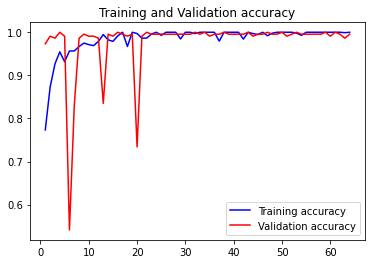

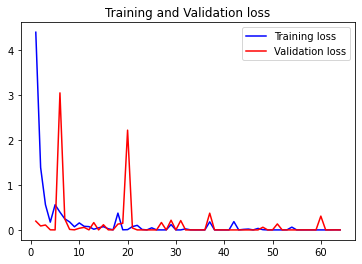

In [40]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
test_imgs=[]
labels=['covid','normal']
for l in labels:
  new_path=os.path.join(test_dir,l)
  num_label=labels.index(l)
  for img in os.listdir(new_path):
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_imgs.append([img,num_label])
    #imgplot=plt.imshow(RGB_img)
    
    #plt.show()


In [42]:
np.array(test_imgs).shape

(576, 2)

In [0]:
random.shuffle(test_imgs)

In [0]:
test_imgs=np.array(test_imgs)
y_test=test_imgs[:,1]
X_test=test_imgs[:,0]

In [0]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [0]:
X_test1=[]
for i in range(len(X_test)):
  X_test1.append(X_test[i])

In [47]:
X_test1=np.array(X_test1)
#y_test1=np.array(y_test1)
X_test1.shape

(576, 300, 300, 3)

In [0]:
#X_test,y_test = read_and_process_image(test_image)
#x=np.array(X_test)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
pred=model.predict(X_test1)

In [50]:
len(pred)

576

In [51]:
len(y_test)

576

In [52]:
for i in range(len(y_test)):
    print(f'{pred[i]} {y_test[i]}')

[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[7.6113125e-09] 0
[1.] 1
[5.596895e-11] 0
[1.] 1
[1.5203213e-09] 0
[2.600402e-14] 0
[1.6235586e-20] 0
[1.] 1
[1.] 1
[3.965788e-15] 0
[1.2432902e-09] 0
[3.4739398e-29] 0
[1.] 1
[1.] 1
[1.] 1
[3.8253926e-27] 0
[4.1891192e-24] 0
[1.] 1
[1.] 1
[5.675258e-27] 0
[1.] 1
[2.4083896e-25] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[2.3355164e-21] 0
[1.] 1
[5.9189924e-14] 0
[1.1476297e-12] 0
[2.9578126e-22] 0
[1.] 1
[1.2636632e-18] 0
[1.] 1
[1.] 1
[1.] 1
[1.0664376e-22] 0
[1.] 1
[1.] 1
[1.7864711e-07] 0
[1.] 1
[4.382782e-12] 0
[1.] 1
[6.651321e-11] 0
[1.] 1
[2.2323204e-26] 0
[1.2211819e-27] 0
[1.] 1
[0.97847706] 0
[1.] 1
[1.0631188e-15] 0
[1.] 1
[2.751281e-21] 0
[6.893054e-17] 0
[0.99994993] 1
[1.] 1
[1.4122115e-24] 0
[7.570568e-17] 0
[1.] 1
[2.4191156e-11] 0
[1.] 1
[1.3953363e-19] 0
[4.303891e-28] 0
[1.] 1
[1.] 1
[1.] 1
[4.630031e-20] 0
[6.091276e-16] 0
[1.] 1
[1.] 1
[3.1948058e-10] 0
[2.6778993e-27] 0
[7.1825297e-25] 0
[1.] 1
[0.9989083] 1
[1.] 1
[1.] 1
[1.4874838e-

In [0]:
#i=0
correct=0
wrong=0
n=0
for iter in range(len(y_test)):
    
  
    if pred[iter]>0.5:
        if y_test[iter]==1:
            correct+=1
        else:
            wrong+=1
    else:
        if y_test[iter]==0:
            correct+=1
        else:
            wrong+=1
        
  
    

In [54]:
print(correct)
print(wrong)

574
2


In [55]:
correct/(correct+wrong)

0.9965277777777778